In [1]:
# import struct

# path = 'data/09020002.DAT'  # Update this to the actual path
# header = [0, 0, 0]  # Initialize header variable as a list of 3 integers
# arrays = [[], [], [], []]  # Initialize 4 arrays

# with open(path, mode='rb') as file:
#     # Read the first 3 bytes as header
#     header = list(struct.unpack('<3I', file.read(12)))

#     while True:
#         data = file.read(16)  # Reading 16 bytes at a time (4 bytes for each interval)
#         if not data:  # If data is empty
#             break

#         # Extract values manually without using struct.unpack
#         values = (
#             int.from_bytes(data[0:4], 'little'),
#             int.from_bytes(data[4:8], 'little'),
#             int.from_bytes(data[8:12], 'little'),
#             int.from_bytes(data[12:16], 'little')
#         )

#         # Add values to respective arrays
#         arrays[0].append(values[0])
#         arrays[1].append(values[1])
#         arrays[2].append(values[2])
#         arrays[3].append(values[3])

# # Print the header and the first few elements of each array
# print("Header:", header, len(header), type(header))
# print("Array1:", arrays[0][-1])
# print("Array2:", arrays[1][:5])
# print("Array3:", arrays[2][:5])
# print("Array4:", arrays[3][:5])
# print("Array3:", len(arrays[2]), type(arrays[2]))
# print("Array4:", len(arrays[3]), type(arrays[3]))


In [2]:
# import numpy as np

# t1 = np.array(arrays[0])
# t2 = np.array(arrays[1])

# t_sampling = t2 - t1
# t_sampling_med = np.median(t_sampling)
# print(t_sampling_med)

# t_gap = t1[1:]  - t2[:-1] 
# print(t_gap[0:5])
# print(np.median(t_gap))

# gap_index_L = np.where( t_gap > np.median(t_gap) + 1000 )
# gap_index_L = gap_index_L[0]
# print(gap_index_L[0:5])

# t = (t1+t2)/2

# dt = t - np.roll(t,1)
# # skip 1st value
# dt = dt[1:]
# print(np.median(dt))



In [3]:

# import numpy as np

# tB4 = np.array(arrays[0])
# tAfter = np.array(arrays[1])

# t_sampling = tAfter - tB4
# t_sampling_med = np.median(t_sampling)
# print('Time spent sampling')
# print(t_sampling[0:5])
# print(t_sampling_med)

# t_gap = tB4[1:]  - tAfter[:-1] 
# print('Gaps')
# print(t_gap[0:5])
# print(np.median(t_gap))
# t_gap_med = np.median(t_gap)

# t2_index_L = []
# none_index = []
# index = 0 

# for t1,t2 in zip(tB4[1:], tAfter[:-1]): 
    
#     t_gap = t1 - t2
#     # print(t_gap)
#     if t_gap >  t_gap_med+t_sampling_med: 
#         t2_index_L.append(index)
#         index += 1
#         # continue
#     elif t_gap <= t_gap_med and t_gap > 0:
#         # t2_index_L.append(index)
#         none_index.append(index)
#         index += 1
#         # continue
#     elif t_gap < 0: 
#         print(t_gap)
# print('indices')
# print(len(t2_index_L))
# print(t2_index_L[0:5])

# # t2_new = []
# # for i in t2_index_L: 
# #     t2_new.append()

# # t2_times = []
# # for i in t2_index_L: 
# #     t2_times.append(tAfter[i])

# # print(t2_times[0:5])
# # print(len(t2_times))
# # print(t2_times[1] - t2_times[0])

# bytes_l = []
# # for i,arr in zip(range(len(t2_index_L)), t2_index_L):
# #     bytes_l.append()
# # print('test')
# temp = 0 
# for arr in t2_index_L: 
#     bytes_l.append((arr+1-temp)*16)
#     temp = arr + 1

#     # print(temp)

# other_l = []
# temp_other = 0 
# for other in none_index:
#     other_l.append((other+1-other)*16)
#     temp_other = other + 1
    
# print('bytes')
# print(bytes_l[0:5])

# print('check')
# print(len(tAfter[none_index])==len(other_l))

# import matplotlib.pyplot as plt 

# plt.scatter(np.array(tAfter[t2_index_L])/1e6,np.array(bytes_l), label = f'gap > {t_gap_med/1e3} ms')
# plt.scatter(np.array(tAfter[none_index])/1e6,np.array(other_l))
# plt.axhline(y=512)
# plt.axhline(y=16)
# plt.xlabel('time (s)')
# plt.legend()

In [4]:
import struct

path = 'data/09020001.DAT'  # Update this to the actual path
# header = [0, 0, 0]  # Initialize header variable as a list of 3 integers
arrays = [[], [], [], []]  # Initialize 4 arrays
# print(header)
with open(path, mode='rb') as file:
    # Read the first 3 bytes as header
    header = list(struct.unpack('<3I', file.read(12)))

    while True:
        data = file.read(16)  # Reading 16 bytes at a time (4 bytes for each interval)
        if not data:  # If data is empty
            break

        # Extract values using struct.unpack
        values = struct.unpack('<4I', data)

        # Extract values manually without using struct.unpack
        # values = (
        #     int.from_bytes(data[0:4], 'little'),
        #     int.from_bytes(data[4:8], 'little'),
        #     int.from_bytes(data[8:12], 'little'),
        #     int.from_bytes(data[12:16], 'little')
        # )

        # Add values to respective arrays
        arrays[0].append(values[0])
        arrays[1].append(values[1])
        arrays[2].append(values[2])
        arrays[3].append(values[3])

print("Header:", header, len(header), type(header))
import numpy as np
print("time1:", np.array(arrays[0][:5]))
print("time2:", np.array(arrays[1][:5]))
print("A0:", arrays[2][:5])
print("A1:", arrays[3][:5])

print("Array3:", len(arrays[2]), type(arrays[2]))
print("Array4:", len(arrays[3]), type(arrays[3]))

Header: [100, 500, 20] 3 <class 'list'>


time1: [346692103 346695592 346699085 346702568 346706056]
time2: [346695057 346698550 346702033 346705522 346709008]
A0: [845, 863, 850, 859, 866]
A1: [40918, 40918, 40920, 40929, 40940]
Array3: 1399 <class 'list'>
Array4: 1399 <class 'list'>


Expected time spent sampling (us):  2000
median time spent sampling (us):  2951.0

Expected gap, no overhead (us):  500
median gap (us):  535.0
largest gap (ms):  3.592
smallest gap (us):  534

no gap, expected number of bytes sent:  16

Expected byte chunk due to SD write:  512
Expected # of lines written per chunk:  32.0

Indices view, count: [ 31  63  95 127] 43
Did we collect all the indices: True
Bytes view: [512, 512, 512, 512]

Len of max valued idx:  43 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Time of max valued idx:  [346803142 346917376 347031908 347146451 347260983 347375476 347490017
 347604558 347718950 347833146 347947692 348062207 348176747 348291255
 348405766 348520276 348634636 348748858 348863380 348977930 349092447
 349206979 349321511 349436040 349550422 349664623 349779104 349893612
 350008121 350122632 350237130 350351612 350465974 350580153 350694699
 350809302 350923963 3

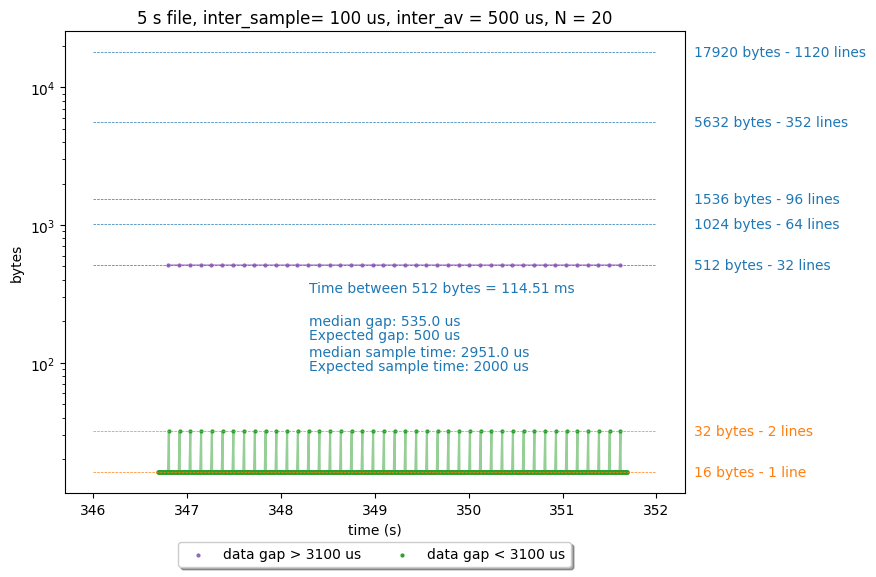

In [83]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

t1 = np.array(arrays[0]) # time before data collection 
t2 = np.array(arrays[1]) # time after data collection 
# print('t2', t2[0:5]/1e6)
# Expected sample rate 
inter_sample = header[0]
inter_average = header[1]
samples_averaged = header[2]
print('Expected time spent sampling (us): ', samples_averaged*inter_sample)

# Time spent sampling 
t_s = t2 - t1 
t_s_med = np.median(t_s) # 2000 us
print("median time spent sampling (us): ", t_s_med)

# Expected gap 
print("\nExpected gap, no overhead (us): ", inter_average)

# Gaps 
t_g = t1[1:] - t2[:-1]
t_g_med = np.median(t_g) # 500 us
print("median gap (us): ", t_g_med)
print("largest gap (ms): ", max(t_g/1e3))
print("smallest gap (us): ", min(t_g))

# no gap number of bytes 
print('\nno gap, expected number of bytes sent: ', 16)
# Expected large gap
print("\nExpected byte chunk due to SD write: ", 512)
print("Expected # of lines written per chunk: ", 512/16)


# collect t2 indices with large gaps 
# -------t2           t1-------------t2       t1-------------t2 

# condition = 600 # NONE
# condition = 1_000 # NONE
# condition = 2_000 # NONE
condition = 3_100 # NONE
# condition = 3_190 # trigger - 64 
# condition = 3_200 # trigger - 64
# condition = 3_300 # trigger - 64
# condition = 3_340 # trigger - MIX 64,96 
# condition = 3_350 # trigger - MIX 64,96 
# condition = 3_400 # trigger - 96 
# condition = 3_500 # trigger - 352
# condition = 3_550 # trigger - 1120
# condition = 3_560 # trigger - 1120
# condition = 3_570 # trigger - 1120
# condition = 3_580 # trigger - 1120
# condition = 3_590 # DOES NOT PLOT

# 3_190 < condition < 3_590 : causes trigger 

indices_t2_L = [] # collect large gaps
indices_t2_S = [] # collect small gaps (all others)
index = 0 
# t = []
# for i in range(len(t2)):
#     t.append(t1[i])
#     t.append(t2[i])
# print("one time",t[0:5])
# t = np.array(t)

# jumps = []
# for i in range(len(t)-1): 
#     if t[i+1] - t[i] > condition: 
#         jumps.append(i)
# print('jumps, len(jumps)', jumps[0:4], len(jumps))

# ----t2 -----gap -- t1 ---data

for t_1,t_2 in zip( t1[1:] , t2[:-1] ):
    
    # check how large the gap is and collect it accordingly
    t_gap = (t_1 - t_2)

    if t_gap >= condition: 
        indices_t2_L.append(index)
        index += 1
        # print('tgap, condition', t_gap, condition)

    elif t_gap < condition:
        indices_t2_S.append(index)
        index += 1
    else: 
        print("why")


# Create Arrays 
# jumps = np.array(jumps)
indices_t2_L = np.array(indices_t2_L)
print('\nIndices view, count:', indices_t2_L[0:4], len(indices_t2_L))
indices_t2_S = np.array(indices_t2_S)
print("Did we collect all the indices:", len(t2) - 1 == (len(indices_t2_L) + len(indices_t2_S)))

# Calculate the number of bytes 
#   (current_index + 1) - previous_index = number of lines 
#   number of lines x 16  = # of bytes sent

# jumps_L = []
# temp_j = 0
# for i in jumps: 
#     jumps_L.append( (i + 1 - temp_j) * 16/2)
#     temp_j = i + 1
# print("jump bytes:", jumps_L[0:4])

bytes_L = []
temp_L = 0
for i in indices_t2_L: 
    bytes_L.append( (i + 1 - temp_L) * 16)
    temp_L = i + 1
print("Bytes view:", bytes_L[0:4])

bytes_S = []
temp_S = 0
for i in indices_t2_S: 
    bytes_S.append( (i + 1 - temp_S) * 16)
    temp_S = i + 1

# Create arrays 
# jumps_L = np.array(jumps_L)

bytes_L = np.array(bytes_L)
# Find the maximum value in bytes_L
max_value = np.max(bytes_L)
# Find the indices where bytes_L has the maximum value
max_indices = np.where(bytes_L == max_value)[0]
print("\nLen of max valued idx: ", len(max_indices), max_indices)
print("Time of max valued idx: ", t2[indices_t2_L[max_indices]])

# Print the indices and corresponding maximum value
print('\nByte value at max idx')
for idx in max_indices:
    print(f"Index: {idx}, Maximum Value: {bytes_L[idx]}")

dt_bytes = t2[indices_t2_L]
# Make a list of the time differences (gaps) between adjacent points:
dt_bytes= dt_bytes - np.roll(dt_bytes,1)
# skip 1st value
dt_bytes= dt_bytes[1:]
dt_med = np.median(dt_bytes)

dt_max_bytes = t2[indices_t2_L[max_indices]]
dt_max_bytes = dt_max_bytes - np.roll(dt_max_bytes,1)
dt_max_bytes= dt_max_bytes[1:]
dt_max_bytes_med = np.median(dt_max_bytes)
print(f"dt between {max_value} bytes (ms): {dt_max_bytes_med/1e3}")
print(f"dt between all bytes (ms): {dt_bytes/1e3}")



bytes_S = np.array(bytes_S)
# print("Did we collect the correct number of elements: ", len(t2) - 1 == (len(bytes_L) + len(bytes_S)))
# print("Did we collect the correct number of elements: ", len(jumps) == (len(jumps_L) ))
print('\nLarge list ')
print("len of bytes: ", len(bytes_L))
print("median byte: ", np.median(bytes_L))
print("largest byt : ", max(bytes_L))
print('\nSmall list')
print("len of bytes: ", len(bytes_S))
print("median byte: ", np.median(bytes_S))
print("largest byte: ", max(bytes_S))

plt.figure(figsize=(8,6))
# plt.plot(t[jumps]/1e6, jumps_L, color = 'C4', alpha=0.5)
# plt.scatter(t[jumps]/1e6, jumps_L, color = 'C4', s=4, label = f'data gap > {condition} us')
plt.plot(t2[indices_t2_L]/1e6, bytes_L, color = 'C4', alpha=0.5)
plt.scatter(t2[indices_t2_L]/1e6, bytes_L, color = 'C4', s=4, label = f'data gap > {condition} us')
plt.plot(t2[indices_t2_S]/1e6, bytes_S, color = 'C2', alpha=0.5)
plt.scatter(t2[indices_t2_S]/1e6, bytes_S, label = f'data gap < {condition} us', color = 'C2',s=4)
# plt.hlines(y=16.0, xmin=346, xmax=352, colors='tab:orange', ls='--', lw=.5, label="16 bytes - 1 line")
# plt.hlines(y=32.0, xmin=346, xmax=352, colors='tab:orange', ls='--', lw=.5, label="32 bytes - 2 lines")
# plt.hlines(y=512.0, xmin=346, xmax=352, colors='tab:blue', ls='--', lw=.5, label="512 bytes - 32 lines")
# plt.hlines(y=1024.0, xmin=346, xmax=352, colors='tab:blue', ls='--', lw=.5, label="1024 bytes - 64 lines")
# plt.hlines(y=1536.0, xmin=346, xmax=352, colors='tab:blue', ls='--', lw=.5, label="1536 bytes - 96 lines")
# plt.hlines(y=5632.0, xmin=346, xmax=352, colors='tab:blue', ls='--', lw=.5, label="5632 bytes - 352 lines")
# plt.hlines(y=17920.0, xmin=346, xmax=352, colors='tab:blue', ls='--', lw=.5, label="17920 bytes - 1120 lines")

plt.hlines(y=16.0, xmin=346, xmax=352, colors='tab:orange', ls='--', lw=.5)
plt.hlines(y=32.0, xmin=346, xmax=352, colors='tab:orange', ls='--', lw=.5)
plt.hlines(y=512.0, xmin=346, xmax=352, colors='tab:blue', ls='--', lw=.5)
plt.hlines(y=1024.0, xmin=346, xmax=352, colors='tab:blue', ls='--', lw=.5)
plt.hlines(y=1536.0, xmin=346, xmax=352, colors='tab:blue', ls='--', lw=.5)
plt.hlines(y=5632.0, xmin=346, xmax=352, colors='tab:blue', ls='--', lw=.5)
plt.hlines(y=17920.0, xmin=346, xmax=352, colors='tab:blue', ls='--', lw=.5)

# Add text annotations for the horizontal lines
plt.text(352.4, 16.0, '16 bytes - 1 line', color='tab:orange', va='center', ha='left', fontsize=10)
plt.text(352.4, 32.0, '32 bytes - 2 lines', color='tab:orange', va='center', ha='left', fontsize=10)
plt.text(352.4, 512.0, '512 bytes - 32 lines', color='tab:blue', va='center', ha='left', fontsize=10)
plt.text(352.4, 1024.0, '1024 bytes - 64 lines', color='tab:blue', va='center', ha='left', fontsize=10)
plt.text(352.4, 1536.0, '1536 bytes - 96 lines', color='tab:blue', va='center', ha='left', fontsize=10)
plt.text(352.4, 5632.0, '5632 bytes - 352 lines', color='tab:blue', va='center', ha='left', fontsize=10)
plt.text(352.4, 17920.0, '17920 bytes - 1120 lines', color='tab:blue', va='center', ha='left', fontsize=10)

plt.text(348.3, 350.0, f'Time between {max_value} bytes = {round(dt_max_bytes_med/1e3,2)} ms', color='tab:blue', va='center', ha='left', fontsize=10)

plt.text(348.3, 200.0, f'median gap: {t_g_med} us', color='tab:blue', va='center', ha='left', fontsize=10)
plt.text(348.3, 160.0, f'Expected gap: {inter_average} us', color='tab:blue', va='center', ha='left', fontsize=10)
plt.text(348.3, 120.0, f'median sample time: {t_s_med} us', color='tab:blue', va='center', ha='left', fontsize=10)
plt.text(348.3, 95.0, f'Expected sample time: {samples_averaged*inter_sample} us', color='tab:blue', va='center', ha='left', fontsize=10)


plt.yscale('log')
plt.xlabel('time (s)')
plt.ylabel('bytes')
plt.title(f'{round((t2[indices_t2_S][-1] - t2[indices_t2_S][0])/1e6)} s file, inter_sample= {inter_sample} us, inter_av = {inter_average} us, N = {samples_averaged}')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09),
          fancybox=True, shadow=True, ncol=5)
plt.savefig('plot.png',bbox_inches ="tight")

expecting 43 gaps
num, idx, gap size
0 31 6161.5
1 63 6451.5
2 95 6464.0
3 127 6462.0
4 159 6457.0
5 191 6460.5
6 223 6465.0
7 255 6301.0
8 287 6134.0
9 319 6437.5
10 351 6441.5
11 383 6443.5
12 415 6445.5
13 447 6445.0
14 479 6451.0
15 511 6286.0
16 543 6133.5
17 575 6461.5
18 607 6459.0
19 639 6461.5
20 671 6461.0
21 703 6460.5
22 735 6456.0
23 767 6304.5
24 799 6136.0
25 831 6438.0
26 863 6444.5
27 895 6445.0
28 927 6441.5
29 959 6445.0
30 991 6438.5
31 1023 6285.0
32 1055 6136.5
33 1087 6458.0
34 1119 6543.0
35 1151 6542.0
36 1183 6467.5
37 1215 6465.5
38 1247 6462.5
39 1279 6302.5
40 1311 6128.5
41 1343 6436.5
42 1375 6445.5
[32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32]


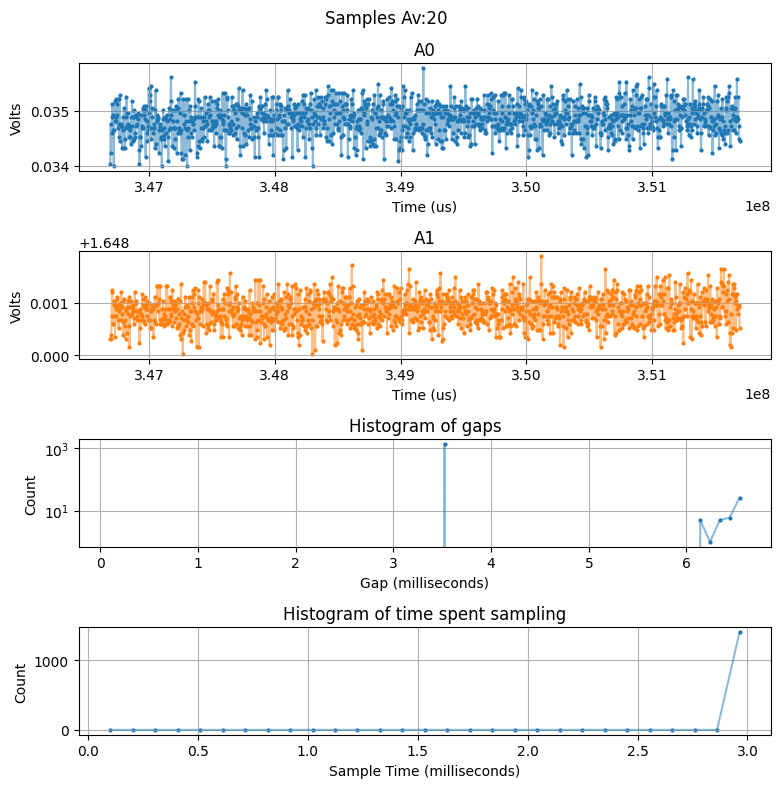

In [71]:
t_mid = (t1+t2)/2
# t_mid = t_mid/1e6
d0 = np.array(arrays[2])
d1 = np.array(arrays[3])
v0 = (d0/samples_averaged)*(3.3/4096)
v1 = (d1/samples_averaged)*(3.3/4096)

# Make a list of the time differences (gaps) between adjacent points:
dt = t_mid - np.roll(t_mid,1)
# skip 1st value
dt = dt[1:]
long_gap = np.where(dt > 4000)[0]
print(f'expecting {len(long_gap)} gaps')
print('num, idx, gap size')
n = 0
idx_gaps = []
for i in long_gap:
    print(n, i,dt[i])
    n += 1
    idx_gaps.append(i)

dt_idx = idx_gaps - np.roll(idx_gaps,1)
dt_idx = dt_idx[1:]
print(dt_idx)

h,tax = np.histogram(dt,range=[0,max(dt)],bins=int(max(dt)/100.))

# Second gap analysis 
dt2 = t2-t1
h2,tax2 = np.histogram(dt2,range=[0, max(dt2)], bins=int(max(dt2)/100.))


fig, axs = plt.subplots(4)
fig.set_size_inches(8,8)

axs[0].scatter(t_mid,v0,s=4)
axs[0].plot(t_mid,v0,alpha=0.5, label ='A0')
axs[0].set_xlabel('Time (us)')
axs[0].set_ylabel('Volts')
axs[0].set_title('A0')
# axs[0].legend()
axs[0].grid()

axs[1].scatter(t_mid,v1,s=4, color ='C1')
axs[1].plot(t_mid,v1,alpha=0.5, color ='C1', label= 'A1')
axs[1].set_xlabel('Time (us)')
axs[1].set_ylabel('Volts')
axs[1].set_title('A1')
# axs[1].legend()
axs[1].grid()

#plot histogram of gaps in milliseconds:
axs[2].plot(tax[1:]/1e3,h,alpha=0.5)
axs[2].scatter(tax[1:]/1e3,h,s=4)
axs[2].set_yscale('log')
axs[2].set_xlabel('Gap (milliseconds)')
axs[2].set_ylabel('Count')
axs[2].set_title('Histogram of gaps')
axs[2].grid()

#plot histogram of gaps in milliseconds:
axs[3].plot(tax2[1:]/1e3,h2,alpha=0.5)
axs[3].scatter(tax2[1:]/1e3,h2,s=4)
axs[3].set_xlabel('Sample Time (milliseconds)')
axs[3].set_ylabel('Count')
axs[3].set_title('Histogram of time spent sampling')
axs[3].grid()

fig.suptitle(f'Samples Av:{samples_averaged}')
fig.subplots_adjust(top=.93)
fig.tight_layout()

plt.savefig('plot2.png')



[6161.5 6451.5 6464.  6462.  6457.  6460.5 6465.  6301.  6134.  6437.5
 6441.5 6443.5 6445.5 6445.  6451.  6286.  6133.5 6461.5 6459.  6461.5
 6461.  6460.5 6456.  6304.5 6136.  6438.  6444.5 6445.  6441.5 6445.
 6438.5 6285.  6136.5 6458.  6543.  6542.  6467.5 6465.5 6462.5 6302.5
 6128.5 6436.5 6445.5]


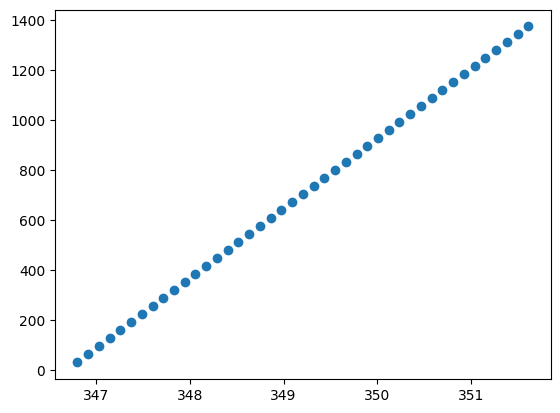

In [82]:
plt.scatter(t_mid[long_gap]/1e6,idx_gaps)
print(dt[long_gap])

In [89]:
# t2[indices_t2_S]
# t2[indices_t2_L]

print(t2[indices_t2_S][0:2], len(t2[indices_t2_S]))
print(t2[indices_t2_L][0:2], len(t2[indices_t2_L]))

print(np.where(t2[indices_t2_S] < t2[indices_t2_L][0] )[0])
print(t2[indices_t2_L][0] - t2[indices_t2_S][29])

[346695057 346698550] 1355
[346803142 346917376] 43
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
6975
